In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import svm
from sklearn import metrics

In [51]:
df = pd.read_csv('dataset/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [52]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [53]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# Labeling Data

In [54]:
labelencoder = LabelEncoder()
cat_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [55]:
cat_cols

['Education', 'City', 'Gender', 'EverBenched']

In [31]:
label_cols = df[cat_cols].apply(LabelEncoder().fit_transform)
label_cols

,Education,City,Gender,EverBenched
0,0,0,1,0
1,0,2,0,0
2,0,1,0,0
3,1,0,1,0
4,1,2,1,1
...,...,...,...,...
4648,0,0,0,0
4649,1,2,1,0
4650,1,1,1,0
4651,0,0,1,1


# Standardization

In [32]:
num_cols = [col for col in df.columns.tolist() if col not in cat_cols]
min_max_scaler = MinMaxScaler()
std_cols_minmax = pd.DataFrame(min_max_scaler.fit_transform(df[num_cols]), columns=num_cols)

In [33]:
#normalisasi hasil pelabelan tadi karena rentang label masih ada yg jauh
num_cols_label = [col for col in label_cols.columns.tolist() if col in cat_cols]
label_cols_minmax = pd.DataFrame(min_max_scaler.fit_transform(label_cols), columns=num_cols_label)

In [34]:
data_final = pd.concat([label_cols_minmax, std_cols_minmax], axis=1)
data_final


,Education,City,Gender,EverBenched,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,0.0,1.0,0.0,0.833333,1.0,0.631579,0.000000,0.0
1,0.0,1.0,0.0,0.0,0.166667,0.0,0.315789,0.428571,1.0
2,0.0,0.5,0.0,0.0,0.333333,1.0,0.842105,0.285714,0.0
3,0.5,0.0,1.0,0.0,0.666667,1.0,0.263158,0.714286,1.0
4,0.5,1.0,1.0,1.0,0.833333,1.0,0.105263,0.285714,1.0
...,...,...,...,...,...,...,...,...,...
4648,0.0,0.0,0.0,0.0,0.166667,1.0,0.210526,0.571429,0.0
4649,0.5,1.0,1.0,0.0,0.166667,0.5,0.789474,0.285714,1.0
4650,0.5,0.5,1.0,0.0,1.000000,1.0,0.263158,0.714286,1.0
4651,0.0,0.0,1.0,1.0,0.000000,1.0,0.421053,0.285714,0.0


# SPLIT DATA dan Balancing

In [35]:
X, y = data_final.drop(['LeaveOrNot'], axis=1), data_final.LeaveOrNot

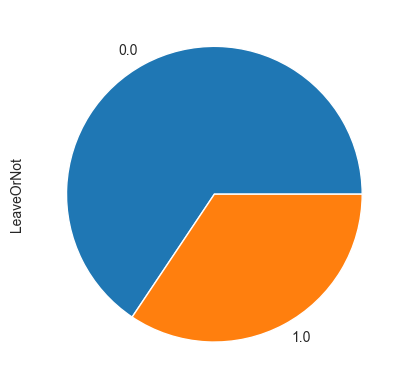

In [36]:
ax = data_final['LeaveOrNot'].value_counts().plot.pie()

Counter({0.0: 3053, 1.0: 3053})


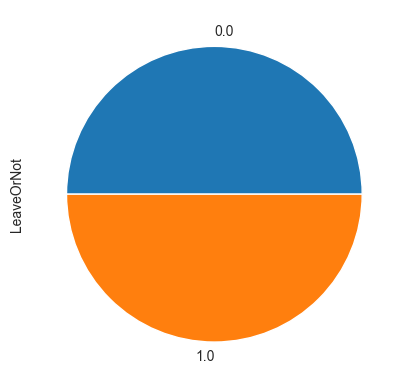

In [37]:
from collections import Counter

oversample = SMOTE()
x_balance, y_balance = oversample.fit_resample(X, y)
counter = Counter(y_balance)
print(counter)
ax = y_balance.value_counts().plot.pie()

# Bagi data train dan test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_balance, y_balance, test_size=0.2)

# KNN Clasifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

accuracy = best_knn.score(X_test, y_test)

In [41]:
print(accuracy)

0.8330605564648118


# Akurasi sebelum di balance

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_scores = grid_search.best_score_

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

accuracy2 = best_knn.score(X_test, y_test)

In [45]:
print(accuracy2)

0.8206229860365198


# Menentukan klasifikasi dengan SVM Clasifier


In [46]:
X_train,X_test,y_train,y_test = train_test_split(x_balance , y_balance,test_size=0.2)

In [47]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_pred = svm_clf.predict(X_test)

In [49]:
svm_accuracy = metrics.accuracy_score(y_test , y_pred)
svm_accuracy

0.6554828150572831